In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #for custom legends
import seaborn as sns
#from lifelines import KaplanMeierFitter #survival analysis library
#from lifelines.statistics import logrank_test #survival statistical testing
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
#from keras.layers import BatchNormalization
#from keras.models import Sequential
#from keras.layers import Dropout
#from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import collections
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold

In [2]:
patientdata = pd.read_csv('Cancer_patient_data.csv')

In [3]:
patientdata.tail()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT
8463,11/28/48,NaN,Male,More than one Race,0,0,1,0,0,NaN,NaN,2/6/15,NaN,NaN
8464,7/5/38,NaN,Female,White,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
8465,6/5/58,NaN,Female,Black/African-American,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
8466,12/29/55,NaN,Female,White,0,0,0,0,1,NaN,NaN,NaN,NaN,1/6/13
8467,4/9/67,NaN,Female,White,0,0,0,0,1,NaN,NaN,NaN,NaN,9/10/12


In [4]:
patientdata.isnull().sum()

BIRTH_DATE_off       0
DEATH_DATE_off    8021
sex                  0
race                 2
LUNG                 0
PANCREAS             0
THYROID              0
COLORECTAL           0
MELANOMA             0
LUNG DT           6983
PANCREAS_DT       7808
THYROID_DT        7723
COLORECTAL_DT     7522
MELANOMA_DT       8122
dtype: int64

In [5]:
patientdata.dtypes

BIRTH_DATE_off    object
DEATH_DATE_off    object
sex               object
race              object
LUNG               int64
PANCREAS           int64
THYROID            int64
COLORECTAL         int64
MELANOMA           int64
LUNG DT           object
PANCREAS_DT       object
THYROID_DT        object
COLORECTAL_DT     object
MELANOMA_DT       object
dtype: object

In [6]:
patient_data_DT = patientdata[['LUNG DT','PANCREAS_DT','THYROID_DT','COLORECTAL_DT','MELANOMA_DT']]

In [7]:
#patientdata['Cancer_Diagnosis_DT'] = patientdata['LUNG DT'] + ',' + patientdata['PANCREAS_DT']

In [8]:
patientdata['Cancer_Diagnosis_DT'] = patient_data_DT.apply(lambda x: ','.join(x[x.notnull()]), axis=1)

In [9]:
patientdata.tail(20)

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Cancer_Diagnosis_DT
8448,9/17/56,NaN,Female,White,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,
8449,3/19/80,3/21/16,Female,White,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,
8450,2/27/68,NaN,Female,White,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,
8451,5/17/59,NaN,Female,White,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,
8452,6/23/53,NaN,Female,White,0,0,0,1,0,NaN,NaN,NaN,11/10/15,NaN,11/10/15
8453,10/10/78,NaN,Female,White,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,
8454,7/9/72,NaN,Female,Black/African-American,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,
8455,4/2/81,NaN,Female,White,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,
8456,1/27/62,4/20/16,Female,Black/African-American,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,
8457,12/9/54,NaN,Female,White,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,


In [10]:
patientdata.isnull().sum()

BIRTH_DATE_off            0
DEATH_DATE_off         8021
sex                       0
race                      2
LUNG                      0
PANCREAS                  0
THYROID                   0
COLORECTAL                0
MELANOMA                  0
LUNG DT                6983
PANCREAS_DT            7808
THYROID_DT             7723
COLORECTAL_DT          7522
MELANOMA_DT            8122
Cancer_Diagnosis_DT       0
dtype: int64

In [11]:
import datetime as dt

In [12]:
"""l = []
for index, row in patientdata.iterrows():
    l = patientdata['Cancer_Diagnosis_DT'].str.split(',',expand=True)
    dates_list = [dt.datetime.strptime(date, '"%m/%d/%y"').date() for date in l]
    #dates_list = [pd.to_datetime(x, format='%m/%d/%y') for x in l]
    patientdata['Cancer_Diagnosis_DT'] = min(dates_list)""""

SyntaxError: EOL while scanning string literal (<ipython-input-12-1e298c53dc84>, line 6)

In [13]:
#patientdata.to_csv('PatientData_DiagnosisDT.csv')

In [14]:
#dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dates]

In [16]:
patientdata = pd.read_csv('subset_clean_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'subset_clean_data.csv'

In [20]:
patientdata.isnull().sum()

BIRTH_DATE_off            0
DEATH_DATE_off         8021
sex                       0
race                      2
LUNG                      0
PANCREAS                  0
THYROID                   0
COLORECTAL                0
MELANOMA                  0
LUNG DT                6983
PANCREAS_DT            7808
THYROID_DT             7723
COLORECTAL_DT          7522
MELANOMA_DT            8122
Cancer_Diagnosis_DT       0
dtype: int64

In [21]:
data = patientdata.copy()

In [22]:
data.drop(['Lung Dt', 'Pancreas Dt', 
                'Thyroid Dt', 'Colorectal Dt','Melanoma Dt','Unnamed: 20'], axis=1, inplace=True)

KeyError: "['Lung Dt' 'Pancreas Dt' 'Thyroid Dt' 'Colorectal Dt' 'Melanoma Dt'\n 'Unnamed: 20'] not found in axis"

In [23]:
data['Censor_data'].fillna(0, inplace=True)

KeyError: 'Censor_data'

In [24]:
data.isnull().sum()

BIRTH_DATE_off            0
DEATH_DATE_off         8021
sex                       0
race                      2
LUNG                      0
PANCREAS                  0
THYROID                   0
COLORECTAL                0
MELANOMA                  0
LUNG DT                6983
PANCREAS_DT            7808
THYROID_DT             7723
COLORECTAL_DT          7522
MELANOMA_DT            8122
Cancer_Diagnosis_DT       0
dtype: int64

In [25]:
data.dtypes

BIRTH_DATE_off         object
DEATH_DATE_off         object
sex                    object
race                   object
LUNG                    int64
PANCREAS                int64
THYROID                 int64
COLORECTAL              int64
MELANOMA                int64
LUNG DT                object
PANCREAS_DT            object
THYROID_DT             object
COLORECTAL_DT          object
MELANOMA_DT            object
Cancer_Diagnosis_DT    object
dtype: object

In [26]:
"""date = "2015-05-25"
[dt.datetime.strptime(date, '"%Y-%m-%d"').date() for date in patientdata['BIRTH_DATE_off']]"""

'date = "2015-05-25"\n[dt.datetime.strptime(date, \'"%Y-%m-%d"\').date() for date in patientdata[\'BIRTH_DATE_off\']]'

In [27]:
data.to_csv('modelling_data.csv')

# EDA

In [33]:
!pip install plotly
!pip install cufflinks

     |████████████████████████████████| 81 kB 4.3 MB/s eta 0:00:011


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=9766cce30cb59d45f0d9b1d3521f519fca88a84682483ea400b9082733951109
  Stored in directory: /Users/akhilranjan/Library/Caches/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [35]:
import plotly as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

ModuleNotFoundError: No module named 'plotly'

In [30]:
! pip install plotly==4.14.3

     |████████████████████████████████| 13.2 MB 5.1 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=e36c81223ce2df80719f618e0e35fd7625677f3a032f0812ddaa3682da19f461
  Stored in directory: /Users/akhilranjan/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [31]:
#data1 = data.copy()
#lab = data1["Survived_patients"].value_counts().keys().tolist()
#values
#val = data1["Survived_patients"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'lime' ,'red'],
                             line = dict(color = "white",
                                         width =  1)
                            ),
               rotation = 90,
               #hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Survived patients in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [39]:
data.dtypes

BIRTH_DATE_off          object
DEATH_DATE_off          object
Sex                     object
Race                    object
Lung                     int64
Pancreas                 int64
Thyroid                  int64
Colorectal               int64
Melanoma                 int64
Cancer Diagnosis DT     object
Diagnosis_Age            int64
Censor_data            float64
Age                      int64
Survived_patients        int64
Survival_years           int64
dtype: object

In [40]:
data.describe()

,Lung,Pancreas,Thyroid,Colorectal,Melanoma,Diagnosis_Age,Censor_data,Age,Survived_patients,Survival_years
count,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000
mean,0.357522,0.158631,0.179364,0.228062,0.083414,60.876567,0.006991,66.346914,0.921408,4.851254
std,0.479328,0.365375,0.383703,0.419633,0.276540,14.936283,0.083331,14.830867,0.269133,3.000732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,0.000000,58.000000,1.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,0.000000,68.000000,1.000000,5.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,77.000000,1.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,99.000000,1.000000,59.000000


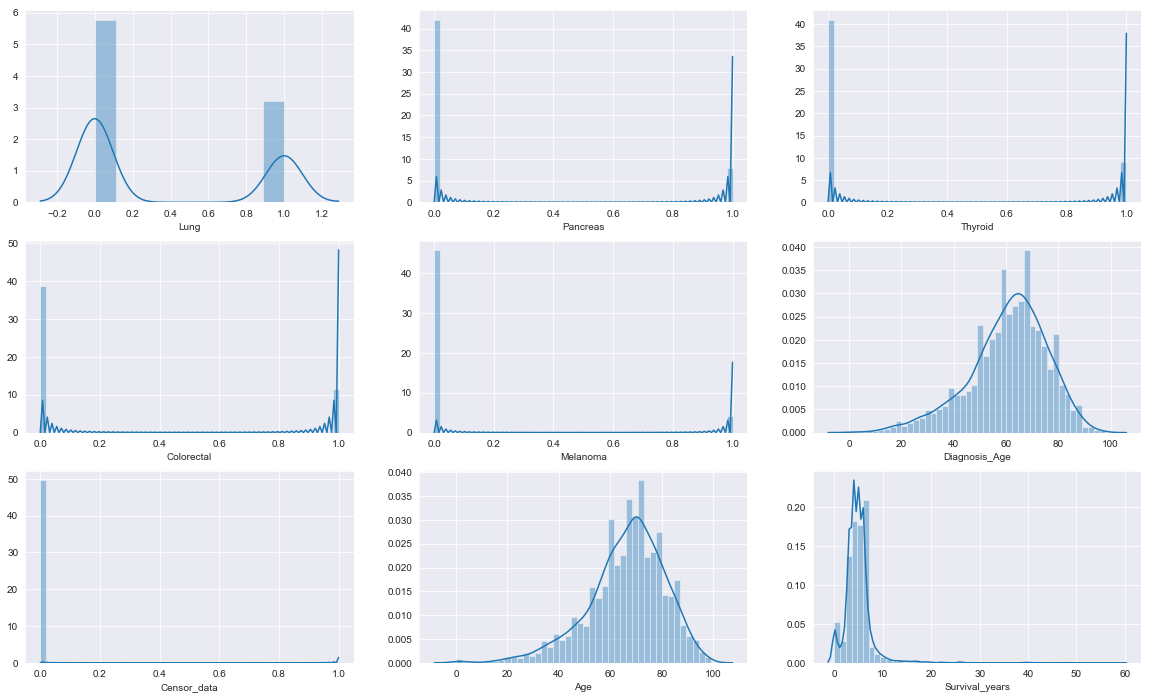

In [48]:
import seaborn as sns
fig , ax = plt.subplots(3,3,figsize=(20,12))
for axis,col in zip(ax.flat,num_cols):
    sns.set_style('darkgrid')
    sns.distplot(data[col], ax=axis)

In [43]:
Date_col     = ['BIRTH_DATE_off','DEATH_DATE_off','Cancer Diagnosis DT']
target_col = ['Survived_patients']
cat_col   = ['Sex', 'Race']
cat_col_group = []
num_cols   = [x for x in data.columns if x not in Date_col + 
              target_col + cat_col + cat_col_group]

In [13]:
def age_group(telcom) :
    
    if telcom["Age"] <= 9 :
        return "0-9"
    elif (telcom["Age"] > 9) & (telcom["Age"] <= 19 ):
        return "10-19"
    elif (telcom["Age"] > 19) & (telcom["Age"] <= 29) :
        return "20-29"
    elif (telcom["Age"] > 29) & (telcom["Age"] <= 39) :
        return "30-39"
    elif (telcom["Age"] > 39) & (telcom["Age"] <= 49) :
        return "40-49"
    elif (telcom["Age"] > 49) & (telcom["Age"] <= 59) :
        return "50-59"
    elif (telcom["Age"] > 59) & (telcom["Age"] <= 69) :
        return "60-69"
    elif (telcom["Age"] > 69) & (telcom["Age"] <= 79) :
        return "70-79"
    elif (telcom["Age"] > 79) & (telcom["Age"] <= 89) :
        return "80-89"
    elif (telcom["Age"] > 89) & (telcom["Age"] <= 99) :
        return "90-99"
    elif telcom["Age"] >= 100 :
        return "100andAbove"
data["Age_group"] = data.apply(lambda data:age_group(data),
                                      axis = 1)

In [52]:
def SurvivalYears_group(telcom) :
    
    if telcom["Survival_years"] < 5 :
        return "0-4"
    elif (telcom["Survival_years"] > 4) & (telcom["Survival_years"] <= 9 ):
        return "5-9"
    elif (telcom["Survival_years"] > 9) & (telcom["Survival_years"] <= 14) :
        return "10-14"
    elif (telcom["Survival_years"] > 14) & (telcom["Survival_years"] <= 19) :
        return "15-19"
    elif (telcom["Survival_years"] > 19) & (telcom["Survival_years"] <= 24) :
        return "20-24"
    elif (telcom["Survival_years"] > 24) & (telcom["Survival_years"] <= 29) :
        return "25-29"
    elif (telcom["Survival_years"] > 29) & (telcom["Survival_years"] <= 34) :
        return "30-34"
    elif (telcom["Survival_years"] > 34) & (telcom["Survival_years"] <= 39) :
        return "35-39"
    elif (telcom["Survival_years"] > 39) & (telcom["Survival_years"] <= 44) :
        return "40-44"
    elif (telcom["Survival_years"] > 44) & (telcom["Survival_years"] <= 49) :
        return "45-49"
    elif (telcom["Survival_years"] > 49) & (telcom["Survival_years"] <= 54) :
        return "50-54"
    elif (telcom["Survival_years"] > 54) & (telcom["Survival_years"] <= 59) :
        return "55-59"
    elif telcom["Survival_years"] >= 60 :
        return "60andAbove"
data["SurvivalYears_group"] = data.apply(lambda data:SurvivalYears_group(data),
                                      axis = 1)

In [53]:
Date_col     = ['BIRTH_DATE_off','DEATH_DATE_off','Cancer Diagnosis DT']
target_col = ['Survived_patients']
cat_col   = ['Sex', 'Race']
cat_col_group = ['SurvivalYears_group','Age_group']
num_cols   = [x for x in data.columns if x not in Date_col + 
              target_col + cat_col + cat_col_group]

In [55]:
data.isnull().sum()

BIRTH_DATE_off            0
DEATH_DATE_off         3822
Sex                       0
Race                      2
Lung                      0
Pancreas                  0
Thyroid                   0
Colorectal                0
Melanoma                  0
Cancer Diagnosis DT       0
Diagnosis_Age             0
Censor_data               0
Age                       0
Survived_patients         0
Survival_years            0
Age_group                 0
SurvivalYears_group       0
dtype: int64

In [57]:
data.dtypes

BIRTH_DATE_off          object
DEATH_DATE_off          object
Sex                     object
Race                    object
Lung                     int64
Pancreas                 int64
Thyroid                  int64
Colorectal               int64
Melanoma                 int64
Cancer Diagnosis DT     object
Diagnosis_Age            int64
Censor_data            float64
Age                      int64
Survived_patients        int64
Survival_years           int64
Age_group               object
SurvivalYears_group     object
dtype: object

Text(0.5,0,'Survived')

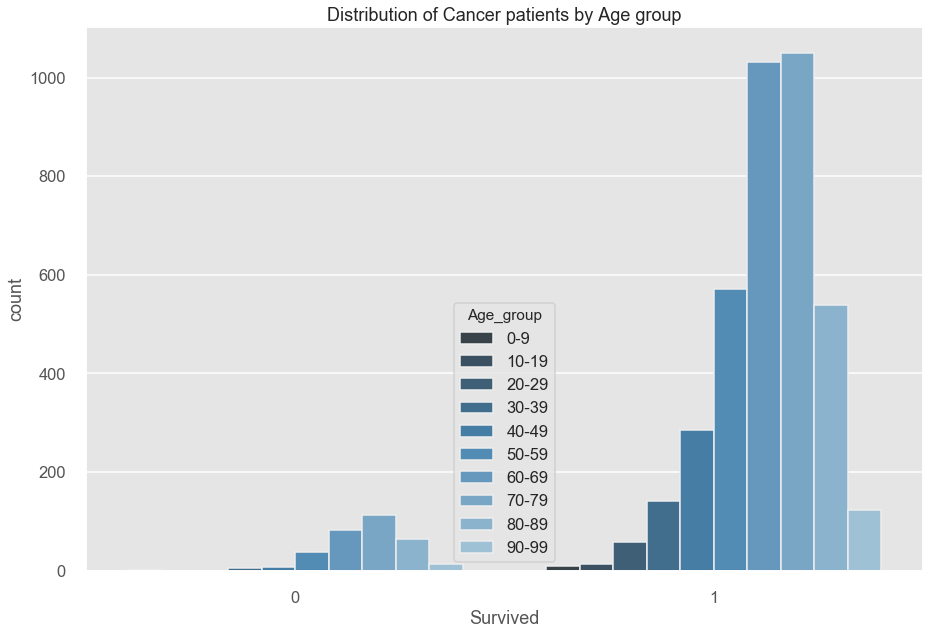

In [68]:
#%matplotlib inline
#import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
sns.set_context('talk')


ncount = len(data["Survived_patients"])
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

sns.set_context('talk')
plt.figure(figsize=(15,10))
ax = sns.countplot(hue="Age_group", x ="Survived_patients",
                data=data,
                hue_order = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"],
                palette = ('Blues_d'));


plt.title('Distribution of Cancer patients by Age group')
plt.xlabel("Survived")



# Use a LinearLocator to ensure the correct number of ticks
#ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
#ax.set_ylim(0,ncount)



#plt.savefig('snscounter.pdf')




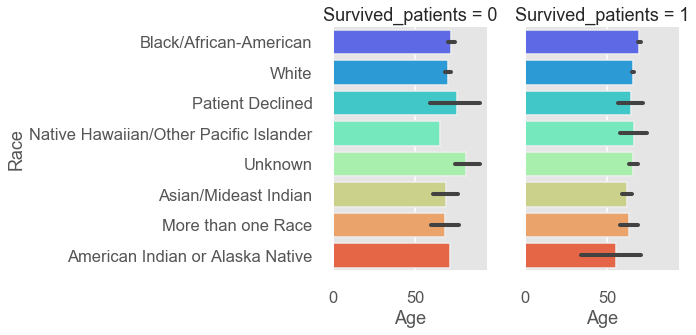

In [71]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
sns.set_context('talk')
g = sns.catplot(y="Race", x = "Age", col="Survived_patients", 
                data=data, kind="bar", palette = ('rainbow'));

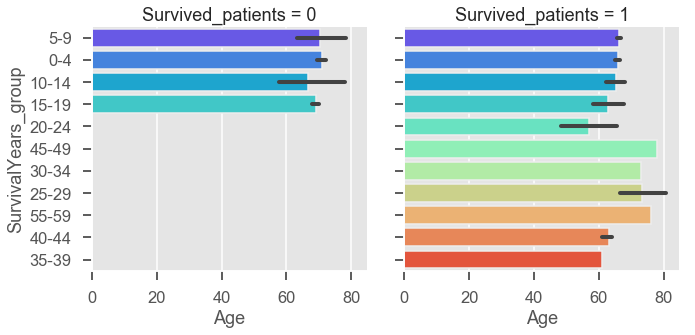

In [93]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
sns.set_context('talk')
g = sns.catplot(y="SurvivalYears_group", x = "Age", col="Survived_patients", 
                data=data, kind="bar", palette = ('rainbow'));

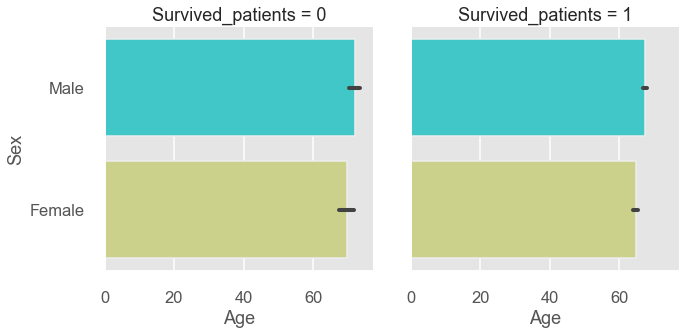

In [74]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
sns.set_context('talk')
g = sns.catplot(y="Sex", x = "Age", col="Survived_patients", 
                data=data, kind="bar", palette = ('rainbow'));

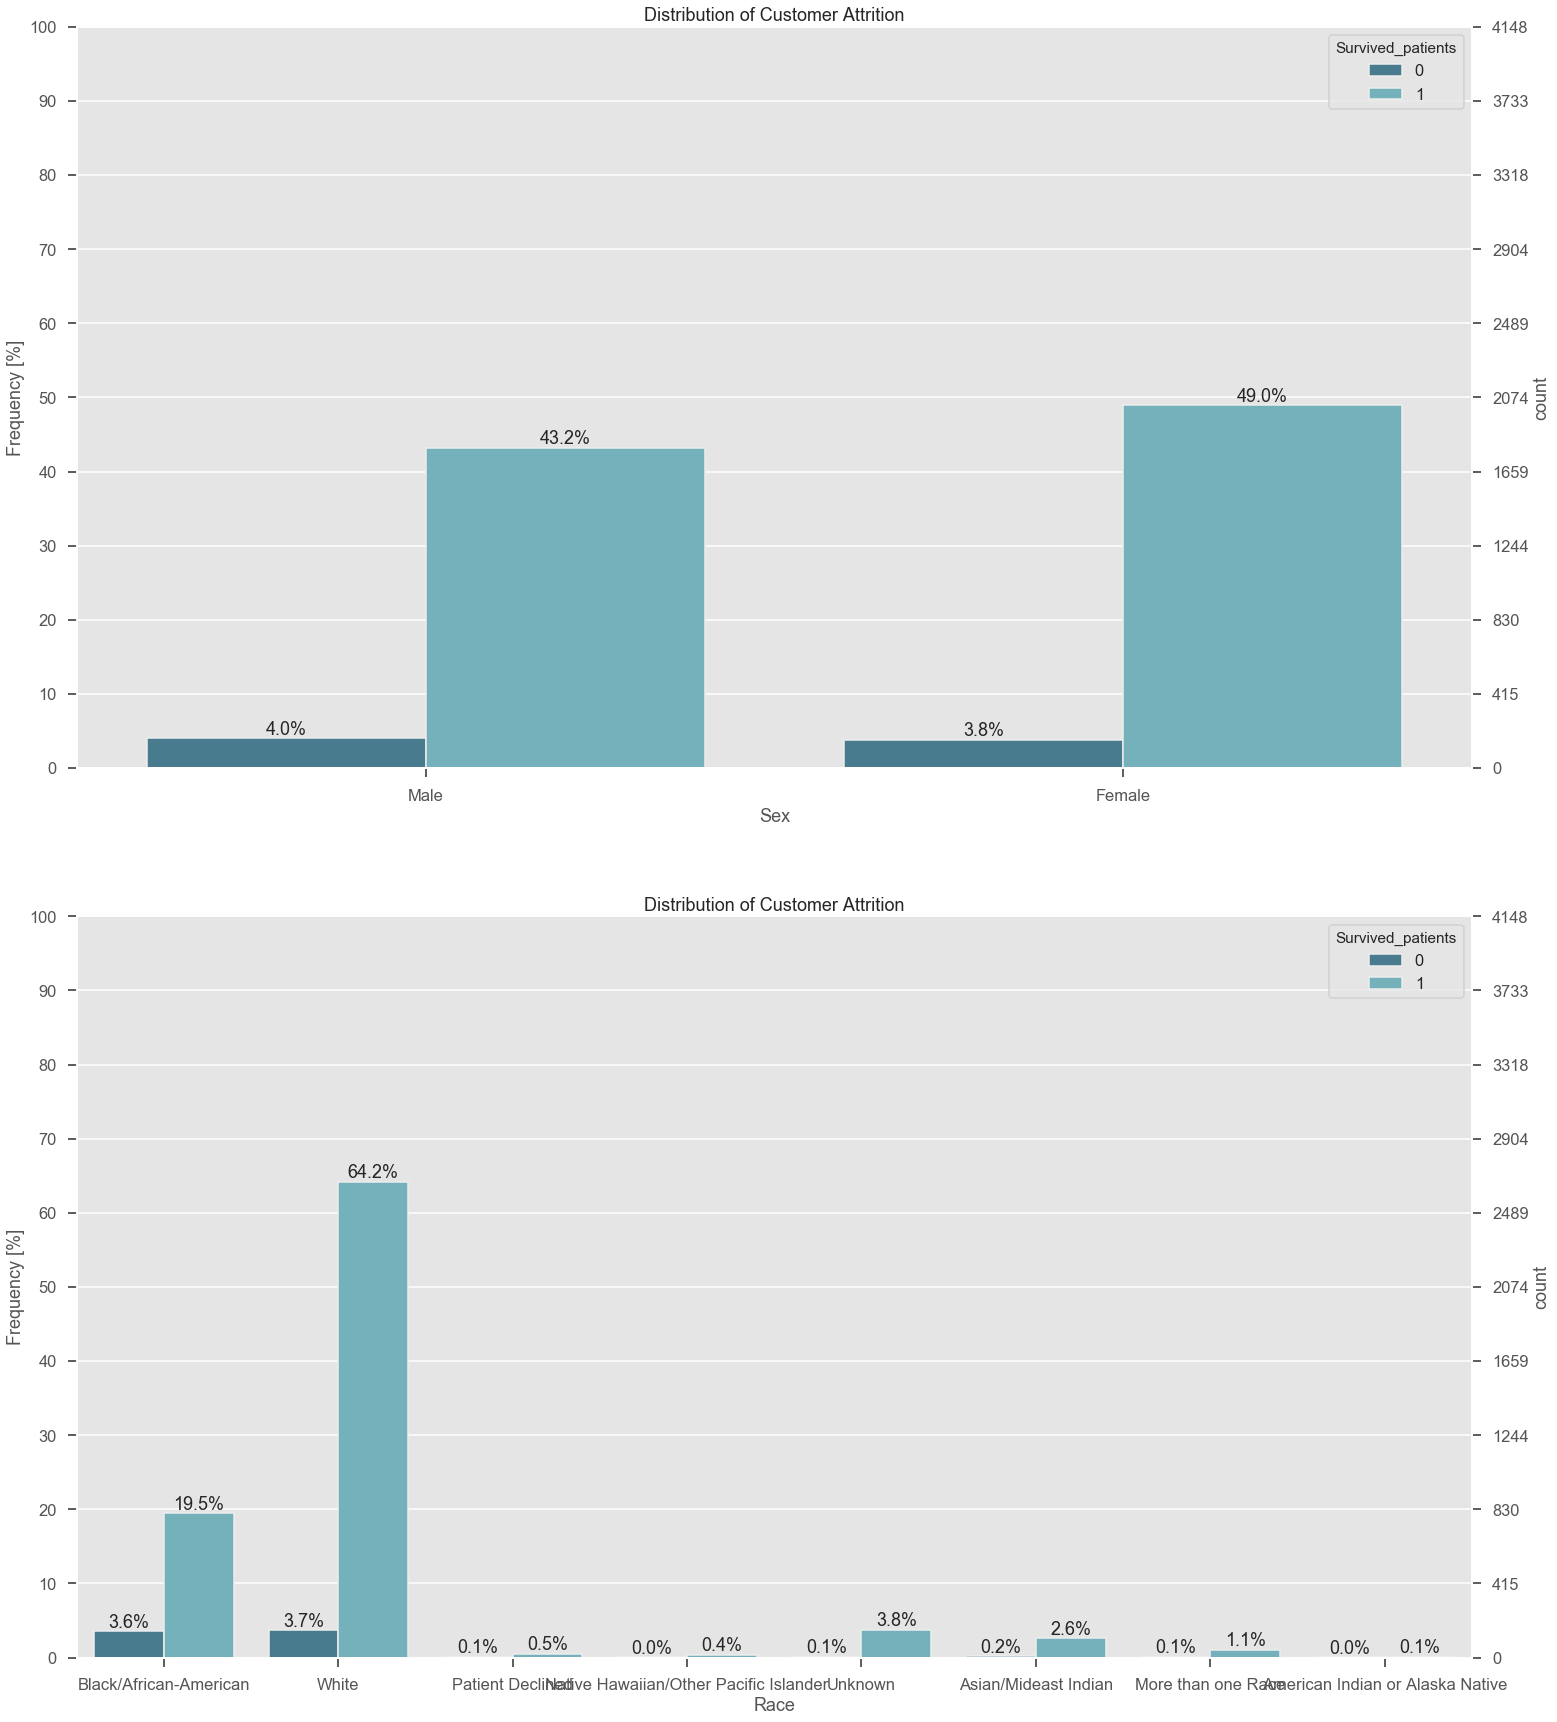

In [81]:
fig , ax = plt.subplots(3,1,figsize=(25,30))
sns.set(style="ticks", color_codes=True)
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
sns.set_context('talk')
for axis,col in zip(ax.flat,cat_col):
    with sns.color_palette("colorblind", 8):
        #plot1 = sns.countplot(x=data[col],hue=data["Churn"],ax=axis)
        #plot1.legend(title = 'Churn', labels = ('No', 'Yes'))
        #plot1.axes.set_title('Churn Balance by)
        ncount = len(data[col])
        style.use('seaborn-poster') #sets the size of the charts
        style.use('ggplot')

        sns.set_context('talk')
        #plt.figure(figsize=(12,8))
        ax = sns.countplot(x=data[col], hue=data["Survived_patients"], palette=("GnBu_d"), ax = axis)

        
        plt.title('Distribution of Customer Attrition')
        plt.xlabel(col)

        # Make twin axis
        ax2=ax.twinx()

        # Switch so count axis is on right, frequency on left
        ax2.yaxis.tick_left()
        ax.yaxis.tick_right()

        # Also switch the labels over
        ax.yaxis.set_label_position('right')
        ax2.yaxis.set_label_position('left')

        ax2.set_ylabel('Frequency [%]')

        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') # set the alignment of the text

        # Use a LinearLocator to ensure the correct number of ticks
        ax.yaxis.set_major_locator(ticker.LinearLocator(11))

        # Fix the frequency range to 0-100
        ax2.set_ylim(0,100)
        ax.set_ylim(0,ncount)

        # And use a MultipleLocator to ensure a tick spacing of 10
        ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

        # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
        ax2.grid(None)

        plt.savefig('snscounter.pdf')

In [85]:
import matplotlib.style as style
style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [92]:
fig , ax = plt.subplots(2,1,figsize=(25,30))
sns.set(style="ticks", color_codes=True)
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
sns.set_context('talk')
for axis,col in zip(ax.flat,cat_col_group):
    with sns.color_palette("colorblind", 8):
        #plot1 = sns.countplot(x=data[col],hue=data["Churn"],ax=axis)
        #plot1.legend(title = 'Churn', labels = ('No', 'Yes'))
        #plot1.axes.set_title('Churn Balance by)
        ncount = len(data[col])
        style.use('seaborn-poster') #sets the size of the charts
        style.use('ggplot')

        sns.set_context('talk')
        #plt.figure(figsize=(12,8))
        ax = sns.countplot(x=data[col], hue=data["Survived_patients"], palette=("GnBu_d"), ax = axis)

        
        plt.title('Distribution of Customer Attrition')
        plt.xlabel(col)

        # Make twin axis
        ax2=ax.twinx()

        # Switch so count axis is on right, frequency on left
        ax2.yaxis.tick_left()
        ax.yaxis.tick_right()

        # Also switch the labels over
        ax.yaxis.set_label_position('right')
        ax2.yaxis.set_label_position('left')

        ax2.set_ylabel('Frequency [%]')

        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') # set the alignment of the text

        # Use a LinearLocator to ensure the correct number of ticks
        ax.yaxis.set_major_locator(ticker.LinearLocator(11))

        # Fix the frequency range to 0-100
        ax2.set_ylim(0,100)
        ax.set_ylim(0,ncount)

        # And use a MultipleLocator to ensure a tick spacing of 10
        ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

        # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
        ax2.grid(None)

        plt.savefig('snscounter.pdf')

RuntimeError: libpng signaled error

# Data Preprocessing

In [12]:
data.head(5)

,BIRTH_DATE_off,DEATH_DATE_off,Sex,Race,Lung,Pancreas,Thyroid,Colorectal,Melanoma,Cancer Diagnosis DT,Diagnosis_Age,Censor_data,Age,Survived_patients,Survival_years
0,12/2/59,NaN,Male,Black/African-American,1,0,0,0,0,9/1/13,53,0.0,59,1,5
1,11/18/55,4/20/16,Male,Black/African-American,1,0,0,0,0,4/2/16,60,0.0,63,0,0
2,1/14/46,5/25/15,Female,Black/African-American,1,0,0,0,0,4/11/15,69,0.0,73,0,0
3,11/3/46,NaN,Female,Black/African-American,0,0,1,0,0,11/29/12,66,0.0,72,1,6
4,6/10/38,NaN,Female,Black/African-American,0,0,1,0,0,6/24/12,74,0.0,80,1,6


## LAbel Encoding

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [37]:
#MultiColumnLabelEncoder(columns = ['Sex','Race']).fit_transform(data)

In [38]:
data['Sex'] = pd.get_dummies(data['Sex'])

KeyError: 'Sex'

In [39]:
data.head(5)

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Cancer_Diagnosis_DT
0,12/2/59,NaN,Male,Black/African-American,1,0,0,0,0,9/1/13,NaN,NaN,NaN,NaN,9/1/13
1,11/18/55,4/20/16,Male,Black/African-American,1,0,0,0,0,4/2/16,NaN,NaN,NaN,NaN,4/2/16
2,1/14/46,5/25/15,Female,Black/African-American,1,0,0,0,0,4/11/15,NaN,NaN,NaN,NaN,4/11/15
3,7/28/32,NaN,Female,Black/African-American,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,
4,4/17/43,NaN,Male,White,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,


In [18]:
#data['Race'] = pd.get_dummies(data['Race'])

In [19]:
data["Race"] = data["Race"].astype('category')
data.dtypes

BIRTH_DATE_off           object
DEATH_DATE_off           object
Sex                       uint8
Race                   category
Lung                      int64
Pancreas                  int64
Thyroid                   int64
Colorectal                int64
Melanoma                  int64
Cancer Diagnosis DT      object
Diagnosis_Age             int64
Censor_data             float64
Age                       int64
Survived_patients         int64
Survival_years            int64
Age_group                object
dtype: object

In [20]:
data["Race_group"] = data["Race"].cat.codes
data.head()

,BIRTH_DATE_off,DEATH_DATE_off,Sex,Race,Lung,Pancreas,Thyroid,Colorectal,Melanoma,Cancer Diagnosis DT,Diagnosis_Age,Censor_data,Age,Survived_patients,Survival_years,Age_group,Race_group
0,12/2/59,NaN,0,Black/African-American,1,0,0,0,0,9/1/13,53,0.0,59,1,5,50-59,2
1,11/18/55,4/20/16,0,Black/African-American,1,0,0,0,0,4/2/16,60,0.0,63,0,0,60-69,2
2,1/14/46,5/25/15,1,Black/African-American,1,0,0,0,0,4/11/15,69,0.0,73,0,0,70-79,2
3,11/3/46,NaN,1,Black/African-American,0,0,1,0,0,11/29/12,66,0.0,72,1,6,70-79,2
4,6/10/38,NaN,1,Black/African-American,0,0,1,0,0,6/24/12,74,0.0,80,1,6,80-89,2


In [21]:
data.tail(5)

,BIRTH_DATE_off,DEATH_DATE_off,Sex,Race,Lung,Pancreas,Thyroid,Colorectal,Melanoma,Cancer Diagnosis DT,Diagnosis_Age,Censor_data,Age,Survived_patients,Survival_years,Age_group,Race_group
4143,6/23/53,NaN,1,White,0,0,0,1,0,11/10/15,62,0.0,65,1,3,60-69,7
4144,7/23/76,NaN,1,White,0,0,1,0,0,6/13/14,37,0.0,42,1,4,40-49,7
4145,11/28/48,NaN,0,More than one Race,0,0,1,0,0,2/6/15,66,0.0,70,1,4,70-79,3
4146,12/29/55,NaN,1,White,0,0,0,0,1,1/6/13,57,0.0,63,1,6,60-69,7
4147,4/9/67,NaN,1,White,0,0,0,0,1,9/10/12,45,0.0,51,1,6,50-59,7


In [22]:
data.to_csv("Modelling.csv")